In [3]:
import pandas as pd

df = pd.read_csv("/Users/payal/SPIC/IPLmatchPrediction/IPL Matches 2008-2020.csv")
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
df.drop(columns=['id','city','date','player_of_match','neutral_venue','result','result_margin','eliminator','method','umpire1','umpire2'],inplace=True)

#dropping null values from winner column
df.dropna(axis=0, subset='winner', inplace=True)

df.head()

,venue,team1,team2,toss_winner,toss_decision,winner
0,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders
1,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings
2,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils
3,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore
4,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders


In [5]:
# import re
import string
def clean_text(text):
    text = text.lower()
    return text

cleantext = lambda x: clean_text(x)

df['venue'] = pd.DataFrame(df.venue.apply(cleantext))
df['team1'] = pd.DataFrame(df.team1.apply(cleantext))
df['team2'] = pd.DataFrame(df.team2.apply(cleantext))
df['toss_winner'] = pd.DataFrame(df.toss_winner.apply(cleantext))
df['toss_decision'] = pd.DataFrame(df.toss_decision.apply(cleantext))
df['winner'] = pd.DataFrame(df.winner.apply(cleantext))

df.head()

,venue,team1,team2,toss_winner,toss_decision,winner
0,m chinnaswamy stadium,royal challengers bangalore,kolkata knight riders,royal challengers bangalore,field,kolkata knight riders
1,"punjab cricket association stadium, mohali",kings xi punjab,chennai super kings,chennai super kings,bat,chennai super kings
2,feroz shah kotla,delhi daredevils,rajasthan royals,rajasthan royals,bat,delhi daredevils
3,wankhede stadium,mumbai indians,royal challengers bangalore,mumbai indians,bat,royal challengers bangalore
4,eden gardens,kolkata knight riders,deccan chargers,deccan chargers,bat,kolkata knight riders


In [6]:
print(df.team1.unique())
df.team2.unique()

['royal challengers bangalore' 'kings xi punjab' 'delhi daredevils'
 'mumbai indians' 'kolkata knight riders' 'rajasthan royals'
 'deccan chargers' 'chennai super kings' 'kochi tuskers kerala'
 'pune warriors' 'sunrisers hyderabad' 'gujarat lions'
 'rising pune supergiants' 'rising pune supergiant' 'delhi capitals']


array(['kolkata knight riders', 'chennai super kings', 'rajasthan royals',
       'royal challengers bangalore', 'deccan chargers',
       'kings xi punjab', 'delhi daredevils', 'mumbai indians',
       'kochi tuskers kerala', 'pune warriors', 'sunrisers hyderabad',
       'rising pune supergiants', 'gujarat lions',
       'rising pune supergiant', 'delhi capitals'], dtype=object)

In [7]:
df.team1 = df.team1.str.replace('delhi daredevils','delhi capitals')
df.team2 = df.team2.str.replace('delhi daredevils','delhi capitals')

df.team1 = df.team1.str.replace('deccan chargers','sunrisers hyderabad')
df.team2 = df.team2.str.replace('deccan chargers','sunrisers hyderabad')

df.drop(df[df.team1 == 'kochi tuskers kerala'].index,inplace = True)
df.drop(df[df.team1 == 'pune warriors'].index,inplace = True)
df.drop(df[df.team1 == 'rising pune supergiants'].index,inplace = True)
df.drop(df[df.team1 == 'gujarat lions'].index,inplace = True)
df.drop(df[df.team1 == 'rising pune supergiant'].index,inplace = True)

df.drop(df[df.team2 == 'kochi tuskers kerala'].index,inplace = True)
df.drop(df[df.team2 == 'pune warriors'].index,inplace = True)
df.drop(df[df.team2 == 'rising pune supergiants'].index,inplace = True)
df.drop(df[df.team2 == 'gujarat lions'].index,inplace = True)
df.drop(df[df.team2 == 'rising pune supergiant'].index,inplace = True)

In [8]:
print(df.team1.unique())
print(len(df.team1.unique()))

print(df.team2.unique())
len(df.team2.unique())

['royal challengers bangalore' 'kings xi punjab' 'delhi capitals'
 'mumbai indians' 'kolkata knight riders' 'rajasthan royals'
 'sunrisers hyderabad' 'chennai super kings']
8
['kolkata knight riders' 'chennai super kings' 'rajasthan royals'
 'royal challengers bangalore' 'sunrisers hyderabad' 'kings xi punjab'
 'delhi capitals' 'mumbai indians']


8

In [9]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X = df[["venue","team1","team2","toss_winner","toss_decision"]]
Y = df["winner"]  

# df['Features'] = df['venue'] + ' ' + df['team1'] + ' ' +df['team2'] + ' ' + df['toss_winner'] + ' ' + df['toss_decision']

# X = df["Features"]
# Y = df["winner"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = X_train.to_dict('records')
X_test = X_test.to_dict('records')
# Y_train = Y_train.to_dict('records')

vect = DictVectorizer()
clf = LogisticRegression()

X_train_transformed = vect.fit_transform(X_train)
X_test_transformed = vect.transform(X_test)
# yytransform = vect.transform(Y_test)

# model = Pipeline([('vectorizer', vect), ('classifier', clf)])
clf.fit(X_train_transformed, Y_train)

# clf.fit(X_train_transformed, yytransform)

LogisticRegression()

In [10]:
from sklearn.metrics import accuracy_score

Y_predict = clf.predict(X_test_transformed)

accuracy = accuracy_score(Y_test, Y_predict)
print('Accuracy:', accuracy*100)

Accuracy: 50.71428571428571


In [11]:
inf = {'venue': 'feroz shah kotla', 'team1': 'kings xi punjab', 'team2': 'kolkata knight riders', 'toss_winner': 'kolkata knight riders', 'toss_decision': 'Field'}

inf_transformed = vect.transform(inf)

hehe = clf.predict(inf_transformed)
hehe

array(['kolkata knight riders'], dtype=object)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (2).

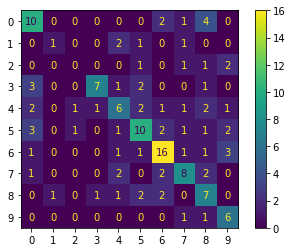

In [16]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=25)
# model_tree = Pipeline([('vectorizer', vect), ('classifier', decision_tree)])

# model_tree.fit(X_train, Y_train)
decision_tree.fit(X_train_transformed, Y_train)

DecisionTreeClassifier(max_depth=25)

In [14]:
# Y_pred_tree = model_tree.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test_transformed)

accuracy = accuracy_score(Y_test, Y_pred_tree)
print('Accuracy:', accuracy*100)

Accuracy: 42.857142857142854


In [15]:
# X_tree_1 = df["venue"] 
# X_tree_3 = df["team1"]
# X_tree_4 = df["team2"]
# X_tree_5 = df["toss_winner"]
# X_tree_6 = df["toss_decision"]

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=35)
random_forest.fit(X_train_transformed, Y_train)

Y_pred_forest = random_forest.predict(X_test_transformed)

accuracy = accuracy_score(Y_test, Y_pred_forest)
print('Accuracy:', accuracy*100)

Accuracy: 47.85714285714286
